# Assignment 5
## Title: Agglomerative and K-Means Clustering

Name: Pranjal Rane

NUID: 002756852

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
iris = load_iris()
data = iris.data[:, :2]
target = iris.target

#### Dendrogram of the iris data using hierarchical clustering using the ward method.

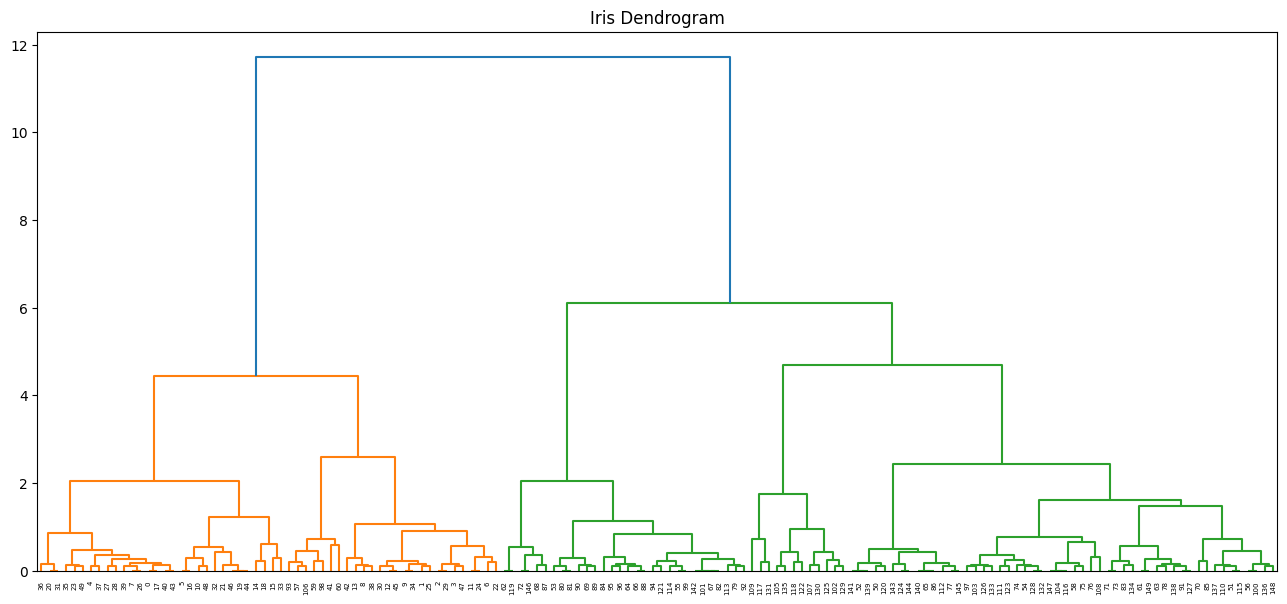

In [8]:
plt.figure(figsize=(16, 7))
plt.title("Iris Dendrogram")
dendogram = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

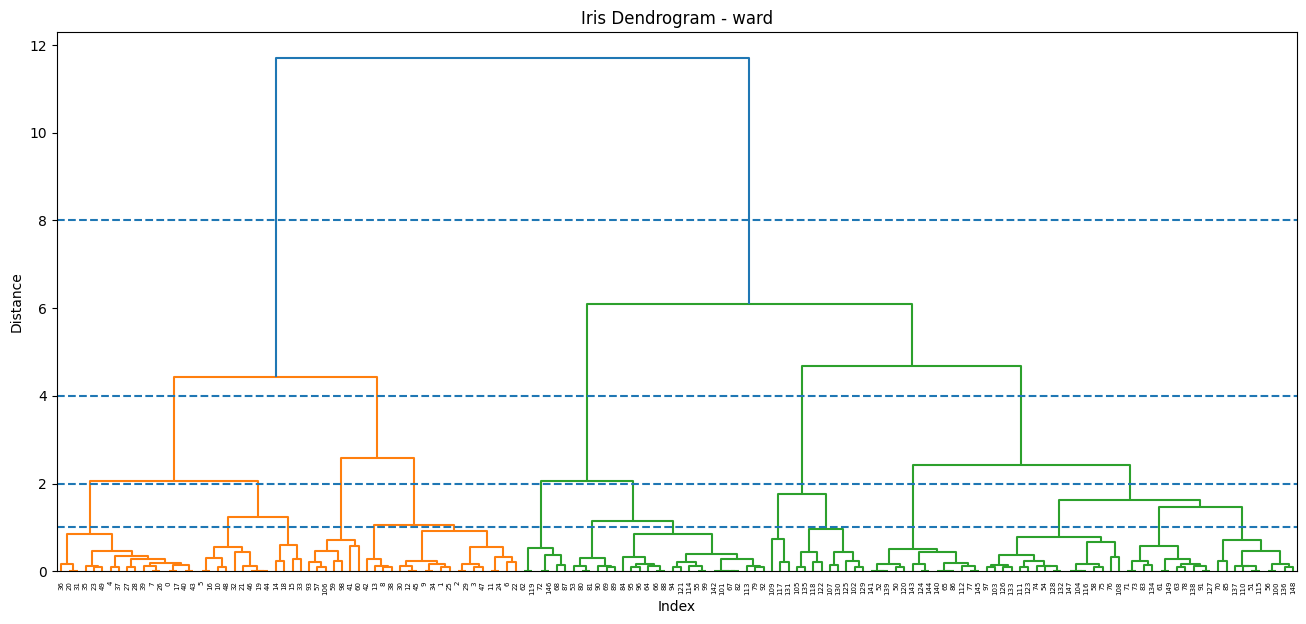

In [9]:
def plot_dendrogram(thresholds,method='ward'):
  plt.figure(figsize=(16, 7))
  plt.title(f"Iris Dendrogram - {method}")
  dendogram = shc.dendrogram(shc.linkage(data, method=method))

  plt.xlabel('Index')
  plt.ylabel('Distance')

  for threshold in thresholds:
      plt.axhline(y=threshold, linestyle='--')

  plt.show()

thresholds = [1, 1.3, 2.5, 3, 5, 10]
thresholds = [2**i for i in range(4)]
plot_dendrogram(thresholds,method='ward')

#### Scatter plots of the data in 2d showing the clusters in different colors using Agglomerative Clustering for different k values.

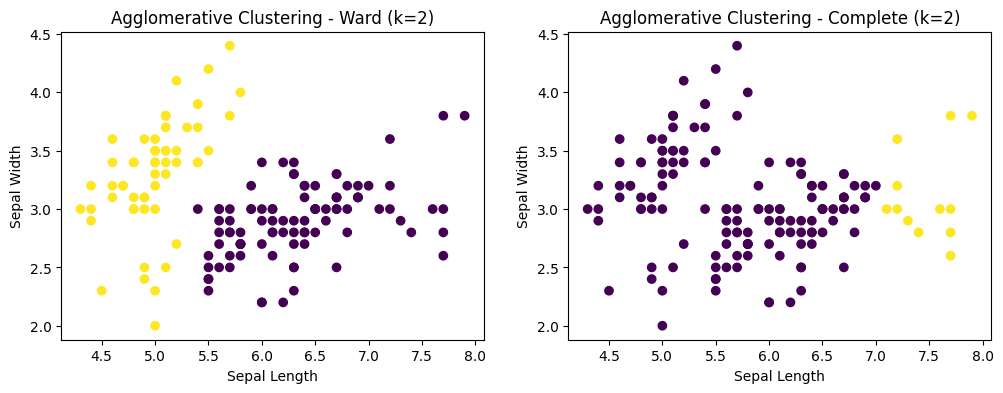

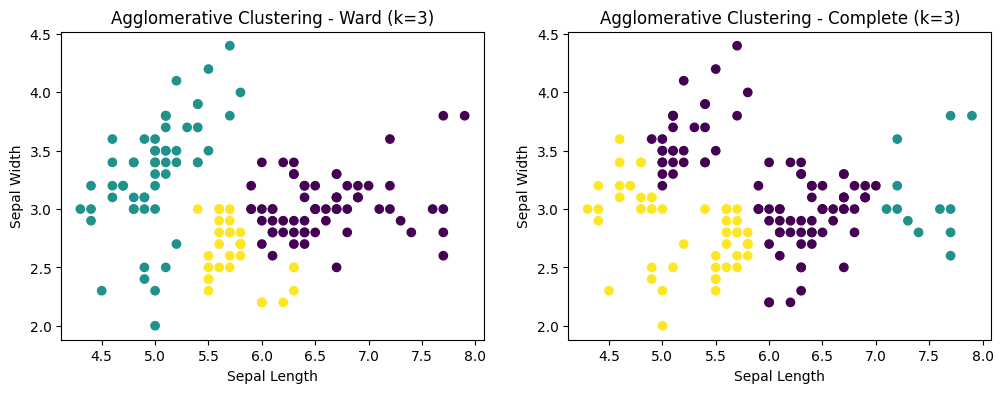

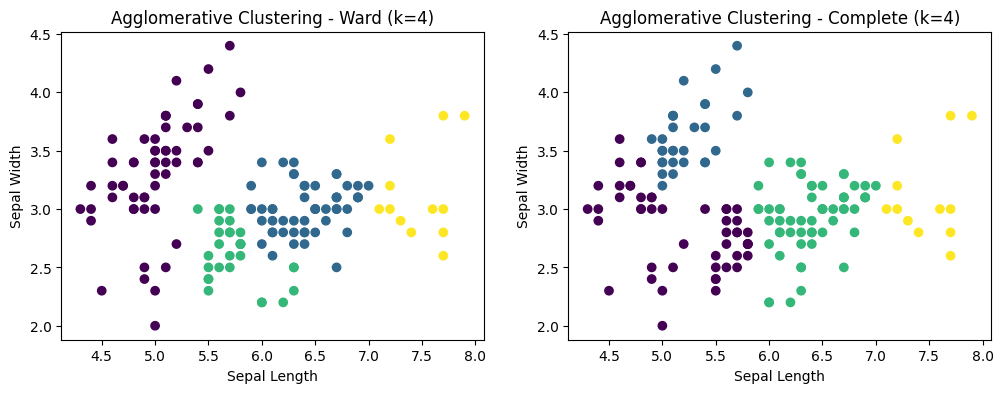

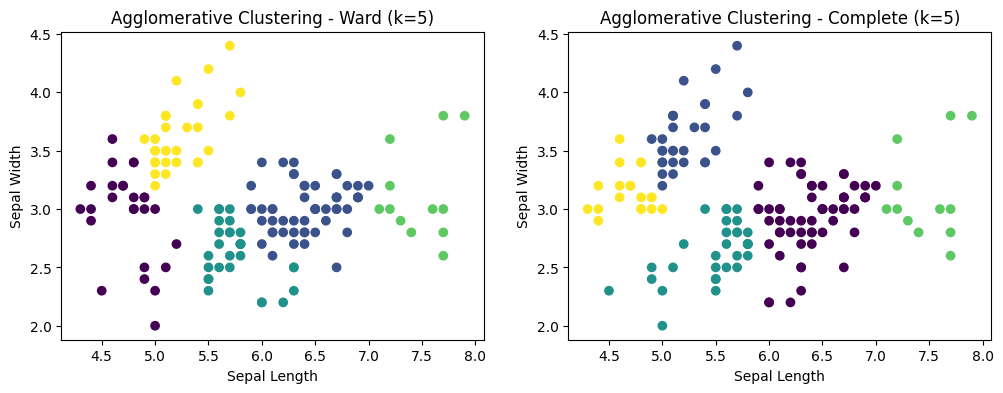

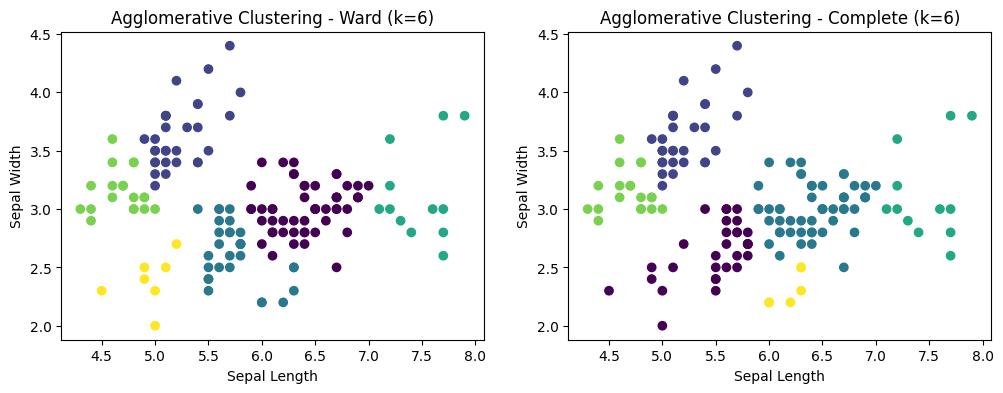

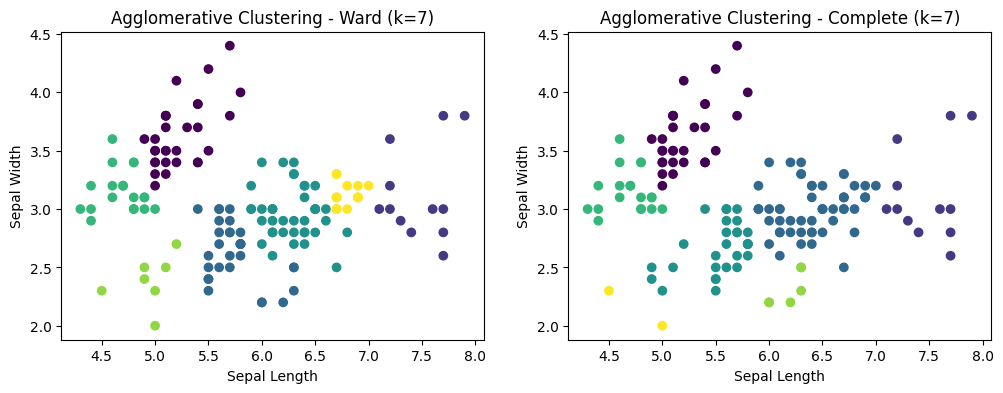

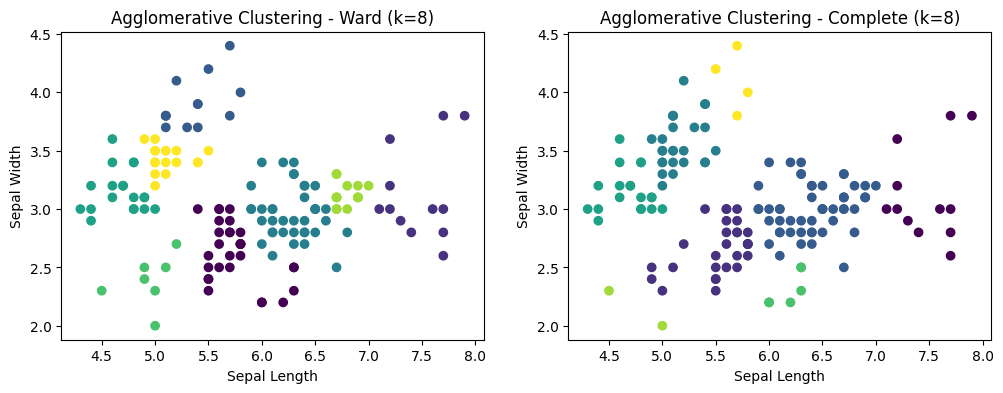

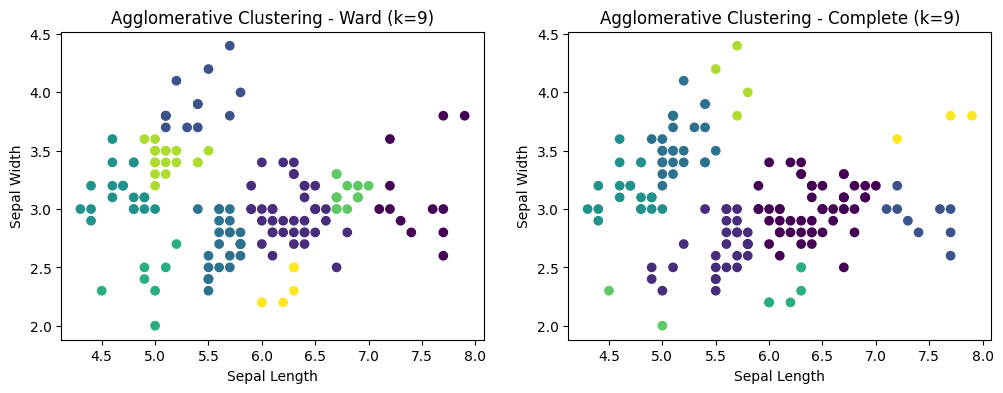

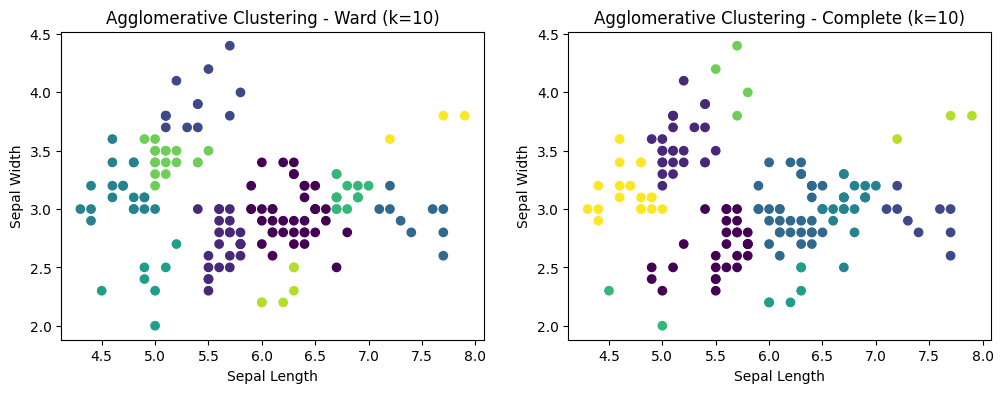

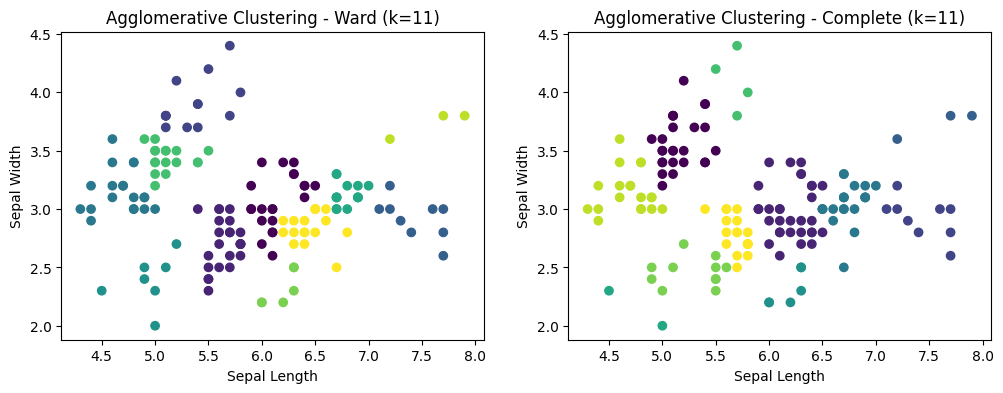

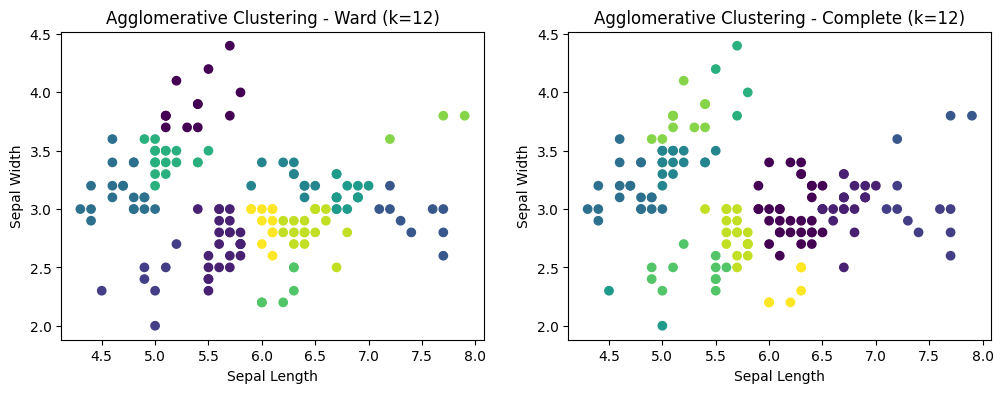

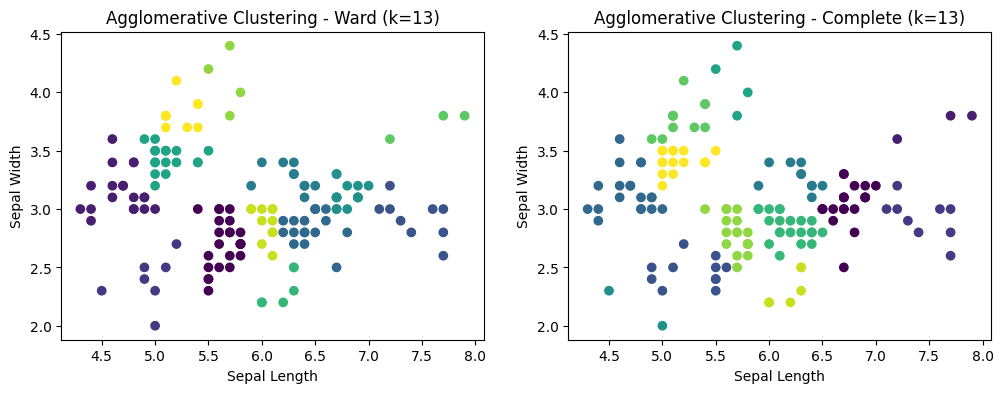

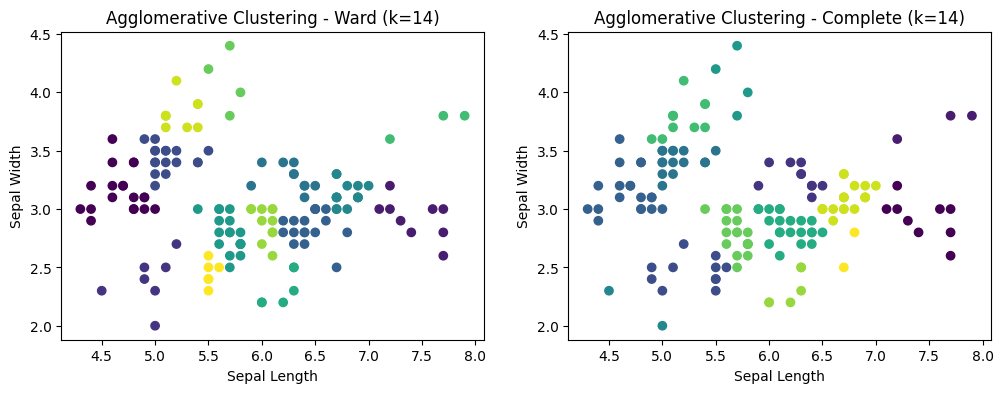

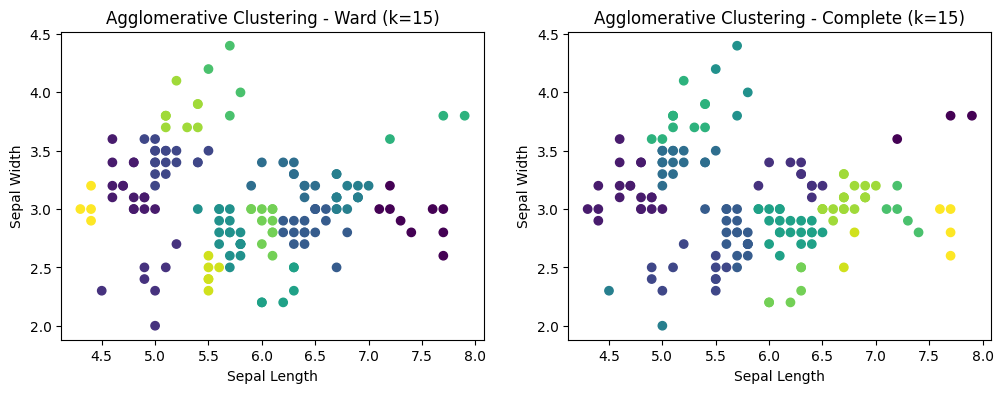

In [11]:
k_values = [i for i in range(2,16)]

for k in k_values:
    # Agglomerative Clustering with Ward linkage
    ward_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    ward_cluster.fit(data)
    ward_labels = ward_cluster.labels_

    complete_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    complete_cluster.fit(data)
    complete_labels = complete_cluster.labels_

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c=ward_labels, cmap='viridis')
    plt.title(f"Agglomerative Clustering - Ward (k={k})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    plt.subplot(1, 2, 2)
    plt.scatter(data[:, 0], data[:, 1], c=complete_labels, cmap='viridis')
    plt.title(f"Agglomerative Clustering - Complete (k={k})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    plt.show()

#### Scatter plot of the data in 2d showing the clusters in different colors using K-Means clustering for different k values

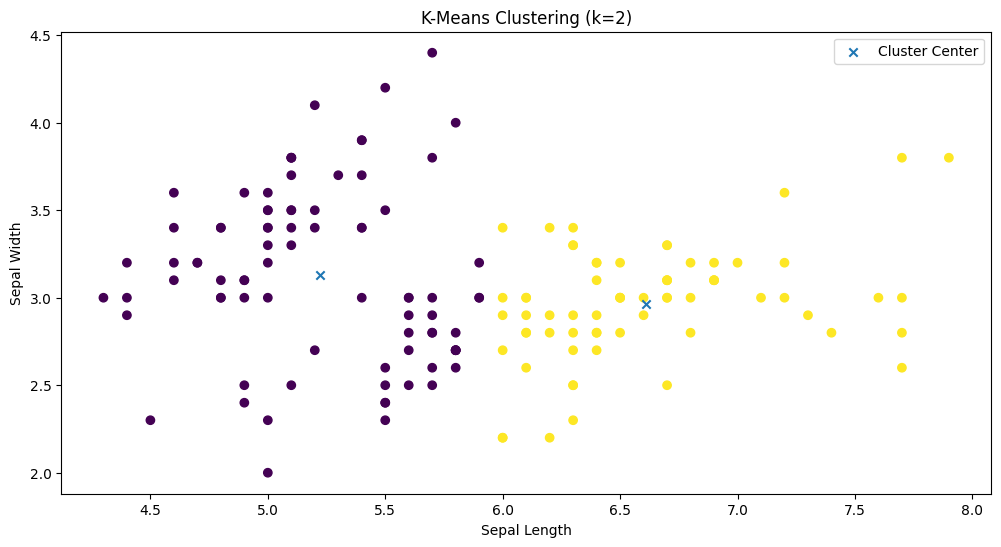

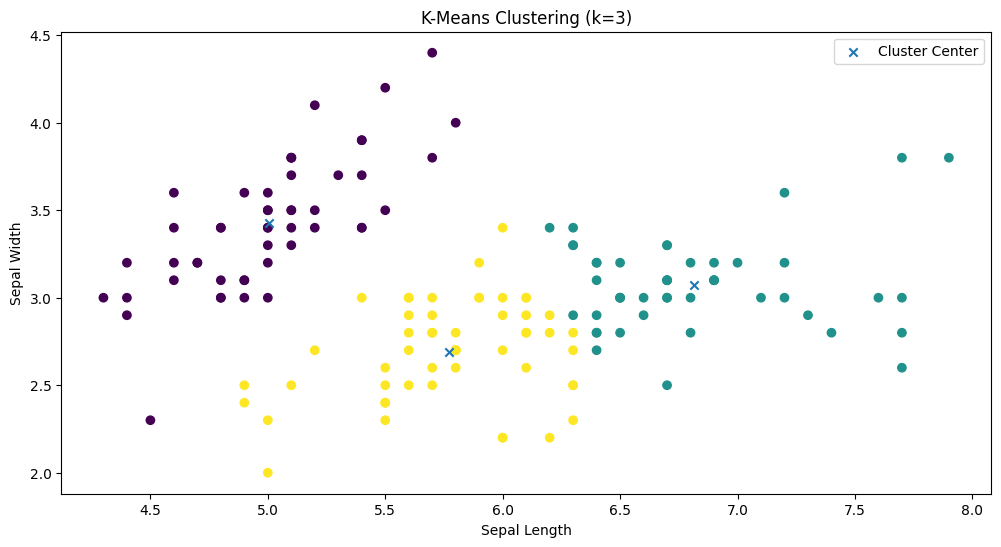

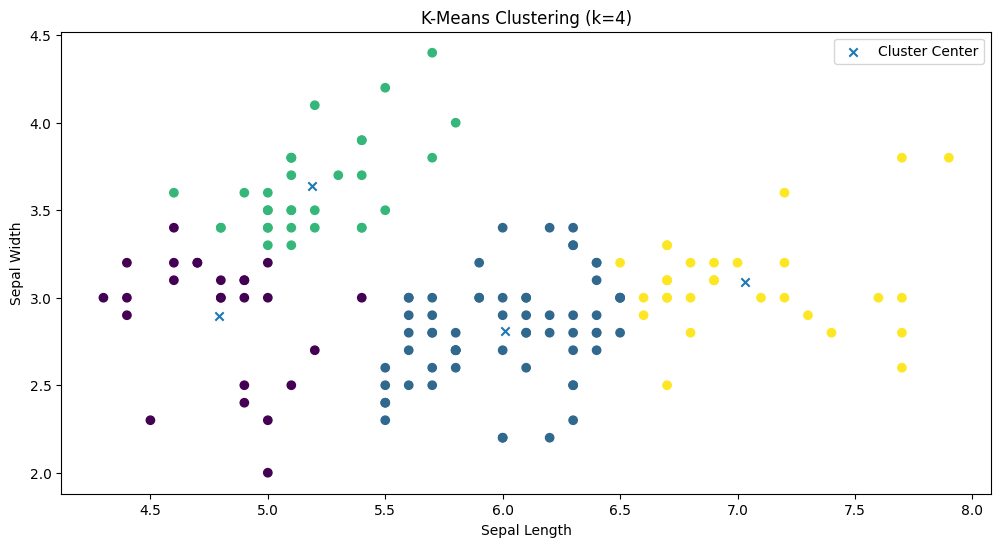

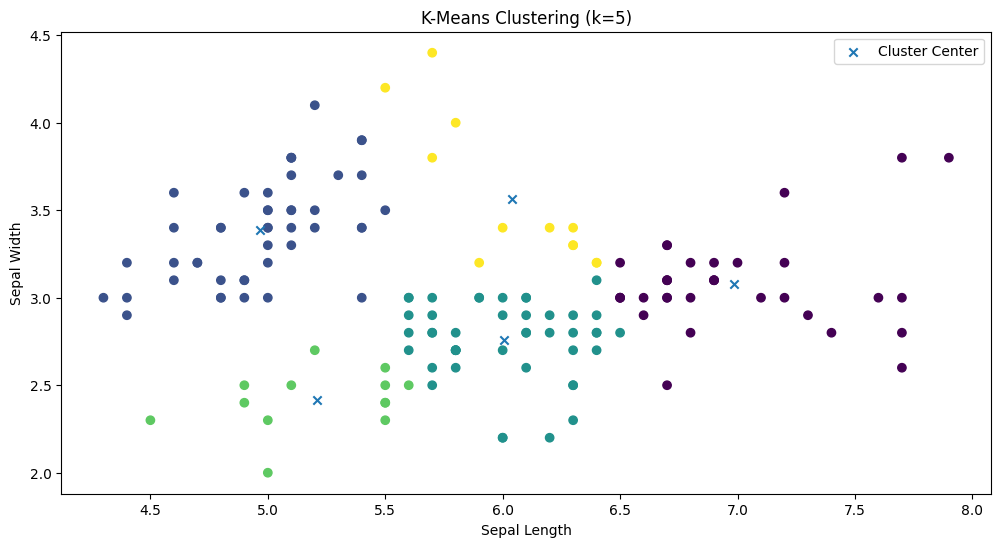

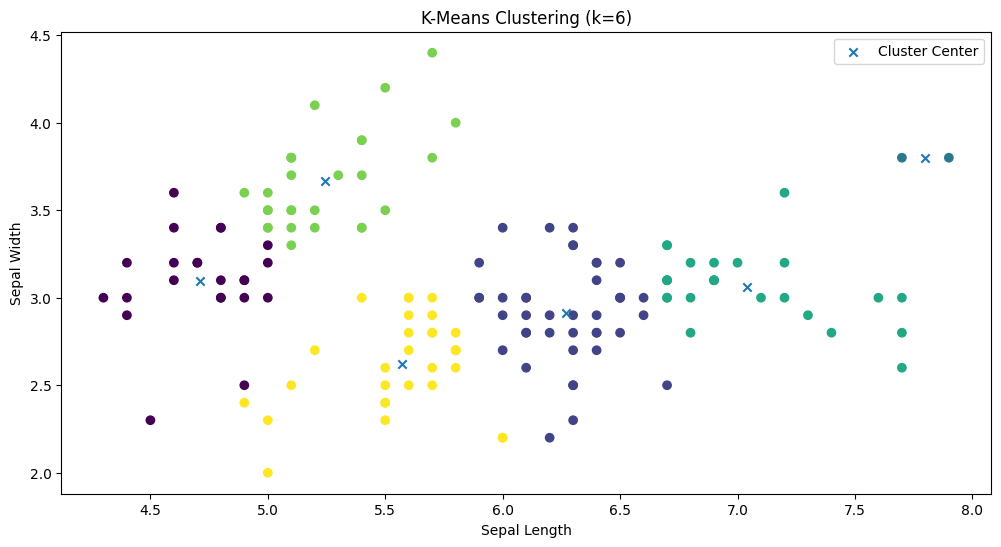

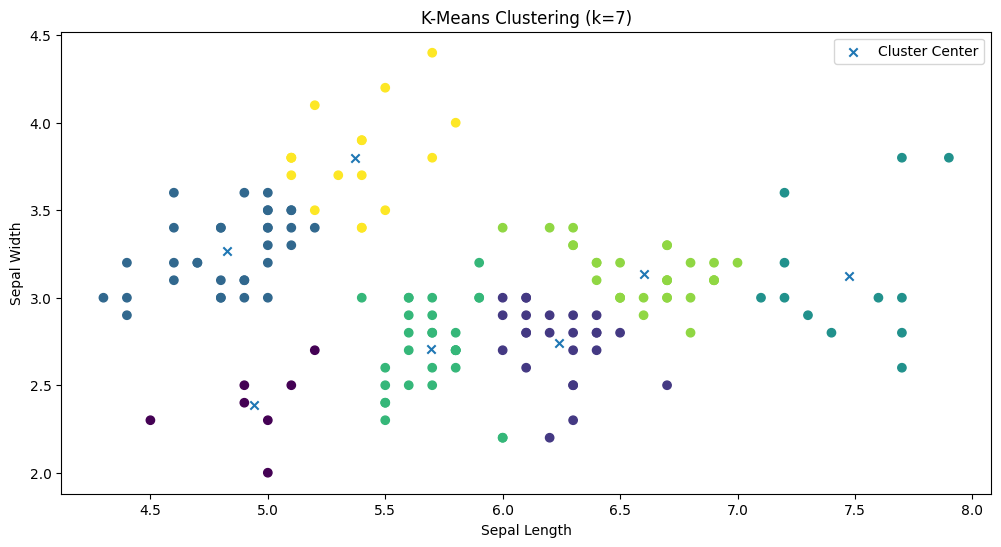

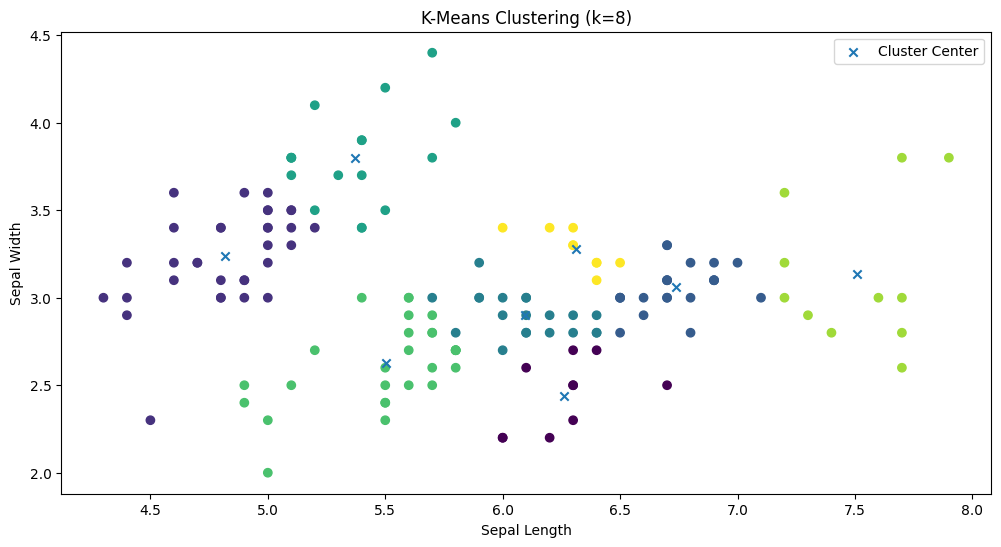

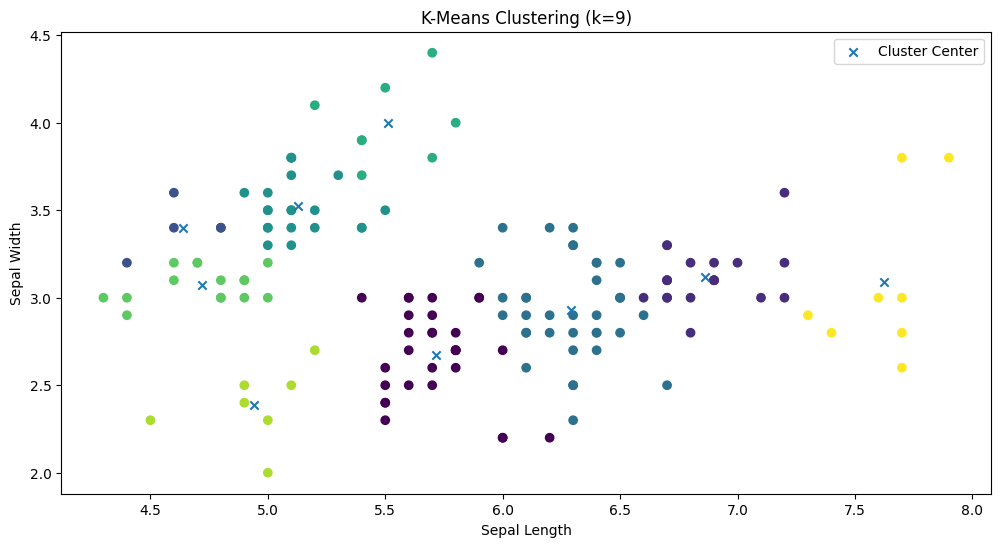

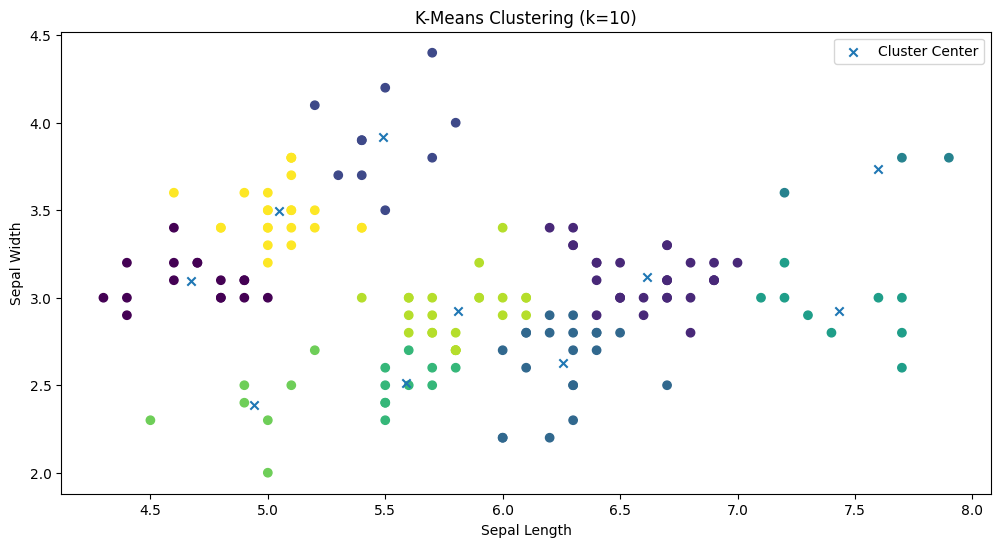

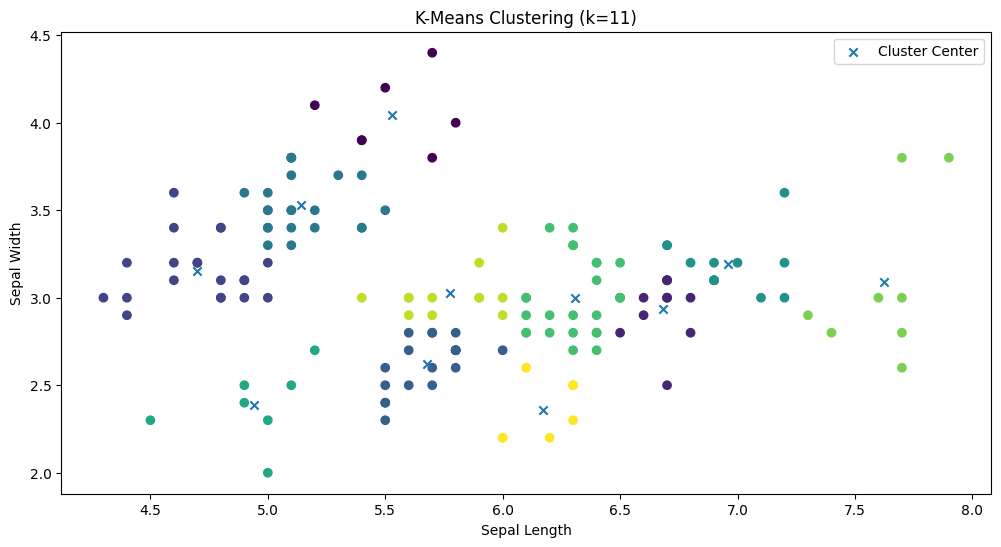

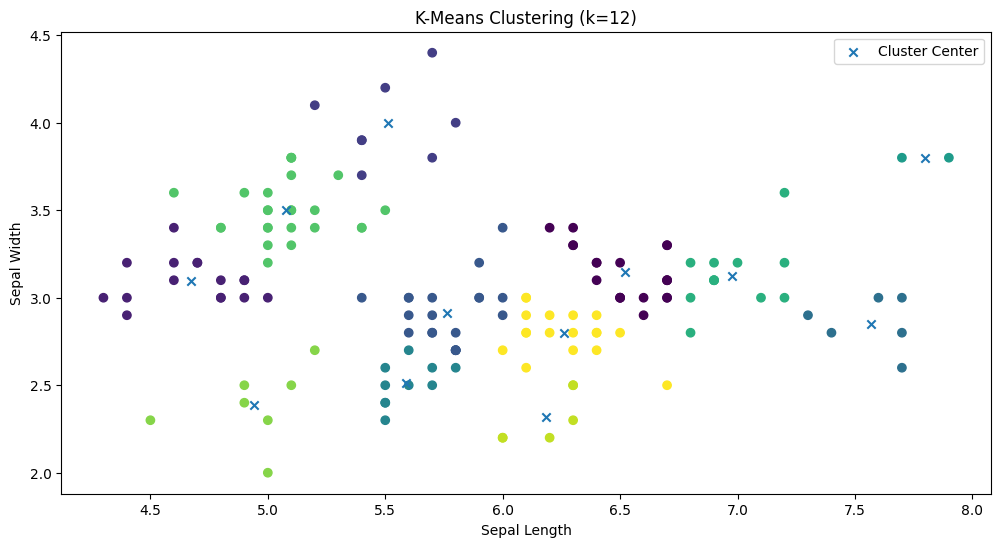

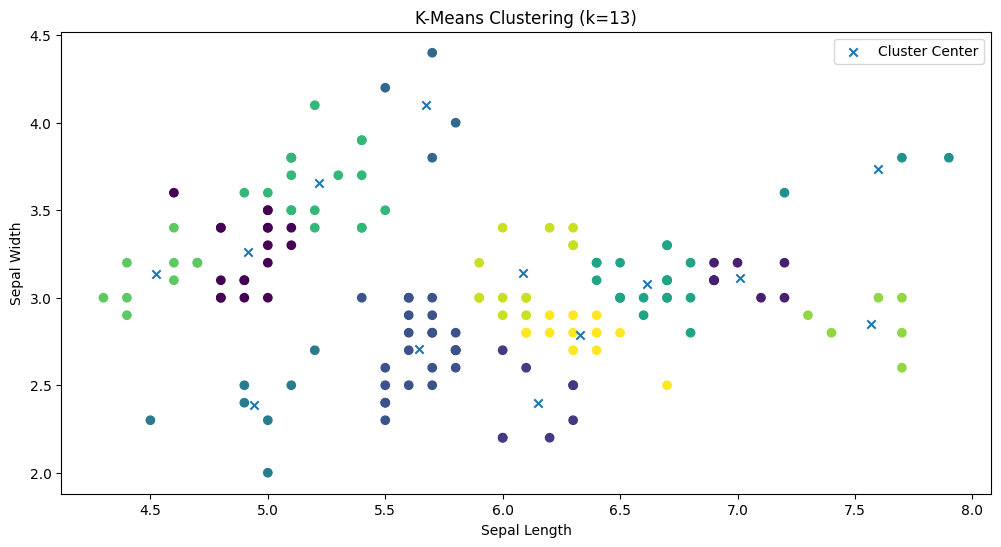

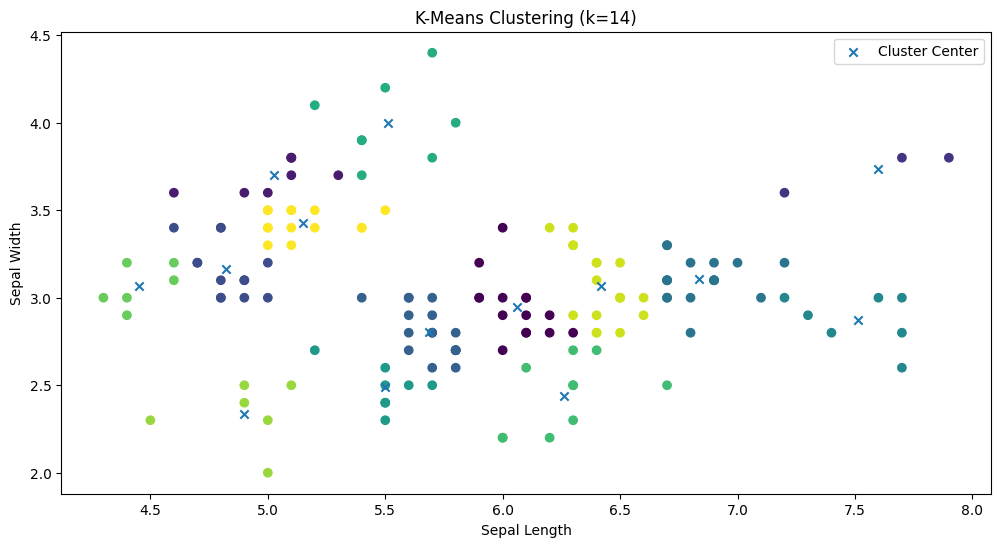

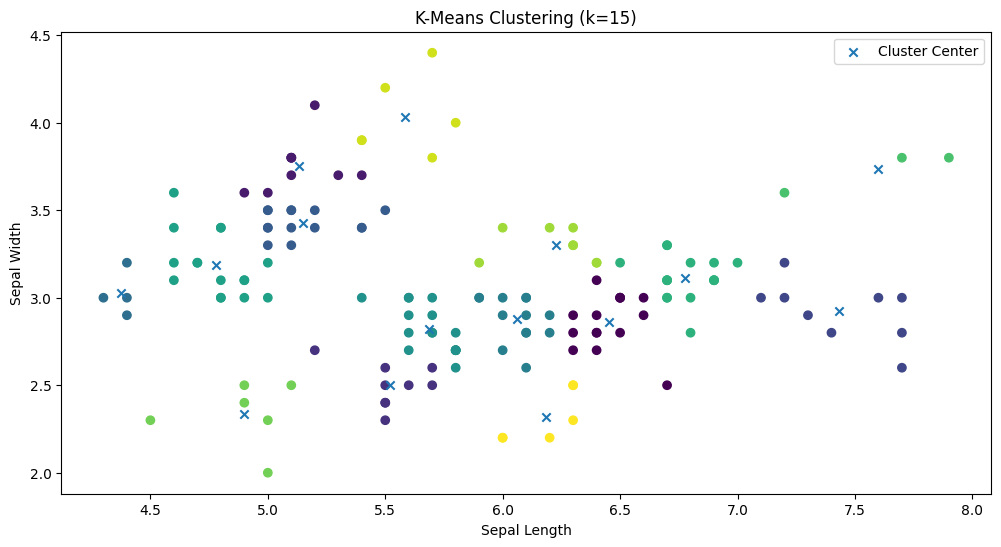

In [12]:
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    plt.figure(figsize=(12, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', label='Cluster Center')
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.show()

#### Subjective Questions

##### 1. Based on the scatter plot of the clustered data, which makes the most sense? Give logical interpretation from the clusters.

Looking at the scatter plots, we can see how data points are spread out and the groups they form.

When we analyze this logically, we can spot trends or differences among these groups with different algorithms. If the groups are clearly separated, it means the clustering algorithm has successfully identified distinct categories in the dataset.

So, based on the information from the scatter plots and the dendrogram, it's a good idea to set the number of clusters at 2 or 3. K-Means clustering and Agglomerative clustering with Ward linkage seem to create more distinct clusters.

##### 2. Compare the plots and clusters found by euclidean distance and complete linkage.

By comparing the dendrograms from the Ward and Complete linkage methods, we notice differences in how the clusters are structured. Ward tends to make clusters of similar sizes, while Complete creates clusters of varying sizes. Complete also merges clusters more gradually, resulting in fewer total clusters than Ward.

##### 3. Compare the scatter plots from Agglomerative and K-Means clustering.

In [14]:
agg_silhouettes = []
agg_rand_indexs = []

kmeans_silhouettes = []
kmeans_rand_indexs = []

for k in k_values:
    agg_cluster = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg_cluster.fit_predict(data)

    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(data)

    agg_silhouette = silhouette_score(data, agg_labels)
    agg_rand_index = adjusted_rand_score(target, agg_labels)
    agg_silhouettes.append(agg_silhouette)
    agg_rand_indexs.append(agg_rand_index)

    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    kmeans_rand_index = adjusted_rand_score(target, kmeans_labels)
    kmeans_silhouettes.append(kmeans_silhouette)
    kmeans_rand_indexs.append(kmeans_rand_index)


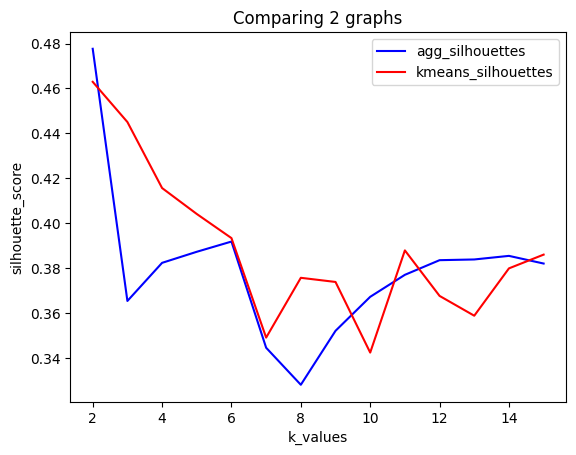

In [15]:
def plot_same_2_graphs(x,y1,y2,y1_label,y2_label,x_label,y_label):
  plt.plot(x, y1, label=y1_label, color='blue')
  plt.plot(x, y2, label=y2_label, color='red')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title("Comparing 2 graphs")
  plt.legend()
  plt.show()
plot_same_2_graphs(k_values,agg_silhouettes,kmeans_silhouettes,'agg_silhouettes','kmeans_silhouettes','k_values','silhouette_score')

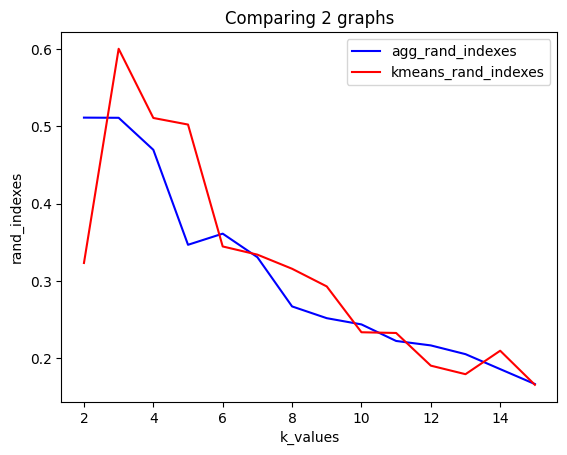

In [16]:
plot_same_2_graphs(k_values,agg_rand_indexs,kmeans_rand_indexs,'agg_rand_indexes','kmeans_rand_indexes','k_values','rand_indexes')

The Silhouette Score quantifies the closeness and isolation of the clusters, with higher values signifying more well-defined clusters.

The Adjusted Rand Index measures the correspondence between the predicted clusters and the actual class labels, with a value approaching 1 indicating a strong agreement.

By contrasting the Silhouette Scores and Adjusted Rand Index values for Agglomerative clustering and K-Means clustering, we can evaluate their effectiveness on the Iris dataset.

In this case the adjusted Rand Index is better for K-Means algorithm for lower number of clusters. Therefore, k-means performs better here.